In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [3]:
data = pd.read_csv('/Users/christine/Bachelor/src/data/meddra_freq.tsv', sep='\t', 
                   names =['Stitch flat', 'Stitch stereo', 'UMLS', 'Placebo', 
                           'Frequency', 'Lower bound', 'Upper bound', 'MedDRA term', 'UMLS concept', 'Side effect'])
data.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
0,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,NaN,5%,0.05,0.05,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,NaN,5%,0.05,0.05,PT,C0000737,Abdominal pain


In [35]:
data.shape

(291632, 10)

In [4]:
unique_text = data["Frequency"][~data["Frequency"].astype(str).str.contains("%", na=False)].unique()
print(unique_text)

['common' 'postmarketing' 'uncommon' 'infrequent' 'frequent' 'rare'
 'very common' 'very rare' '0 to 2' '0-2' '8 to 66' '8-66' '0 to 33'
 '0-33' '10 to 13' '10-13' '1 to 13' '1-13' '1 to 2' '1-2' '31 to 43'
 '31-43' '1 to 6' '1-6' 'very frequent']


In [5]:
# How many are "postmarketing", "rare", "infrequent", "frequent", "common"
for factor in unique_text:
    print(factor, len(data[data['Frequency'] == factor]))

common 9178
postmarketing 41655
uncommon 10054
infrequent 13089
frequent 3069
rare 12600
very common 2395
very rare 3564
0 to 2 3
0-2 3
8 to 66 2
8-66 2
0 to 33 2
0-33 2
10 to 13 2
10-13 2
1 to 13 2
1-13 2
1 to 2 6
1-2 6
31 to 43 4
31-43 4
1 to 6 2
1-6 2
very frequent 2


In [6]:
data['Upper bound'].iloc[6966]

np.float64(0.001)

In [6]:
# Subsets based on frequency
postmarketing = data[data['Frequency'] == "postmarketing"]
rare = data[data['Frequency'] == "rare"]
infrequent = data[data['Frequency'] == "infrequent"]
frequent = data[data['Frequency'] == "frequent"]
common = data[data['Frequency'] == "common"]
uncommon = data[data['Frequency'] == "uncommon"]
very_frequent = data[data['Frequency'] == "very frequent"]
very_rare = data[data['Frequency'] == "very rare"]
very_common = data[data['Frequency'] == "very common"]

In [7]:
def unique_vals(subset):
    print(f'{subset['Frequency'].iloc[0]}s bounds are [{subset["Lower bound"].unique()}, {subset["Upper bound"].unique()}] \n')

subsets = [postmarketing, rare, infrequent, frequent, common, uncommon, very_frequent, very_rare, very_common]
for subset in subsets:
    unique_vals(subset)

postmarketings bounds are [[0.], [0.001]] 

rares bounds are [[0.], [0.001]] 

infrequents bounds are [[0.001], [0.01]] 

frequents bounds are [[0.01], [1.]] 

commons bounds are [[0.01], [1.]] 

uncommons bounds are [[0.001], [0.01]] 

very frequents bounds are [[0.1], [1.]] 

very rares bounds are [[0.], [0.0001]] 

very commons bounds are [[0.1], [1.]] 



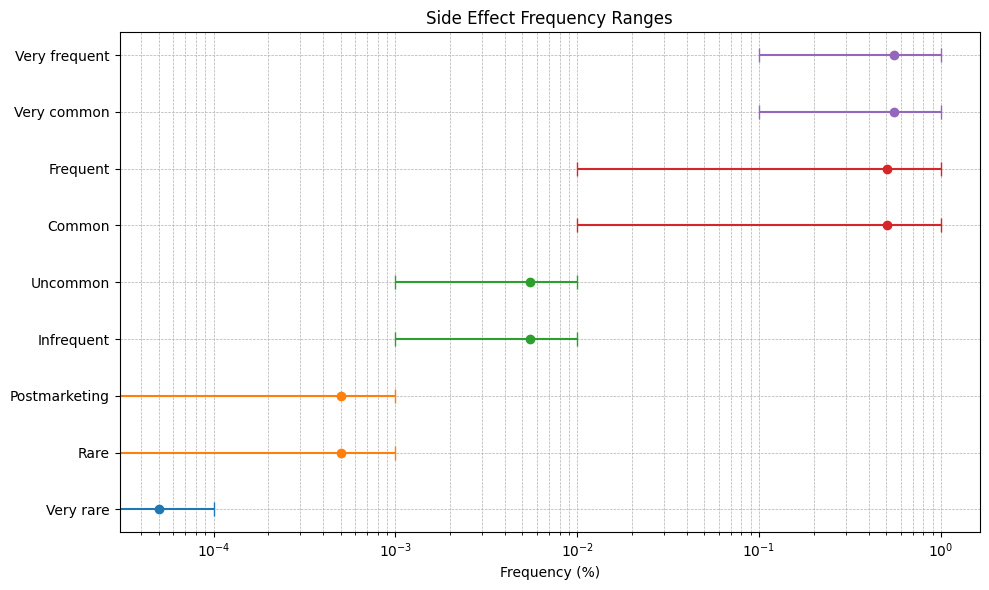

In [10]:
categories = ['Very rare', 'Rare', 'Postmarketing', 'Infrequent', 'Uncommon', 'Common', 'Frequent', 'Very common', 'Very frequent']
lower_bounds = [0.0, 0.0, 0.0, 0.001, 0.001, 0.01, 0.01, 0.1, 0.1]
upper_bounds = [0.0001, 0.001, 0.001, 0.01, 0.01, 1.0, 1.0, 1.0, 1.0]
midpoints = (np.array(lower_bounds) + np.array(upper_bounds)) / 2
errors = [midpoints - np.array(lower_bounds), np.array(upper_bounds) - midpoints]

category_colors = {
    'Very rare': '#1f77b4',
    'Rare': '#ff7f0e',
    'Postmarketing': '#ff7f0e',
    'Infrequent': '#2ca02c',
    'Uncommon': '#2ca02c',
    'Common': '#d62728',
    'Frequent': '#d62728',
    'Very common': '#9467bd',
    'Very frequent': '#9467bd'
}


# plt.figure(figsize=(8, 6))
# plt.errorbar(midpoints, categories, xerr=errors, fmt='o', capsize=5, label="Frequency Ranges", color="b")
# plt.xscale("log")
# plt.xlabel("Frequency (%)")
# plt.title("Side Effect Frequency Ranges")
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.legend()
# plt.show()
plt.figure(figsize=(10, 6))

for i, cat in enumerate(categories):
    plt.errorbar(midpoints[i], cat,
                 xerr=[[errors[0][i]], [errors[1][i]]],
                 fmt='o',
                 capsize=5,
                 color=category_colors[cat],
                 label=cat)

plt.xscale("log")
plt.xlabel("Frequency (%)")
plt.title("Side Effect Frequency Ranges")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


plt.tight_layout()
plt.show()


Means of the lower and upper bounds
Postmarketing 0.0 0.0010000000000000005
Rare 0.0 0.0010000000000000005
Infrequent 0.0010000000000000002 0.009999999999999998
Frequent 0.009999999999999998 1.0
Common 0.01 1.0
Uncommon 0.0010000000000000005 0.009999999999999998
Very frequent 0.1 1.0
Very rare 0.0 0.00010000000000000002
Very common 0.1 1.0


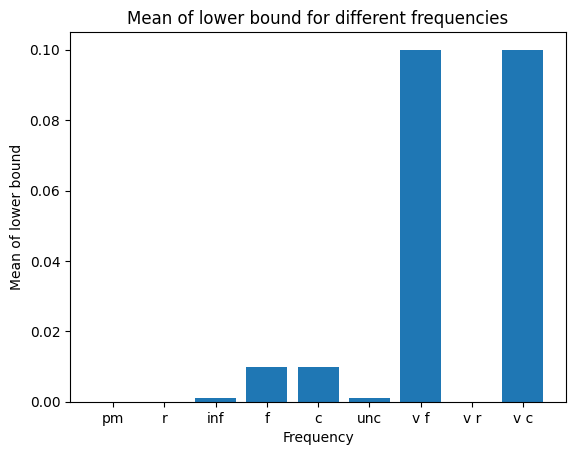

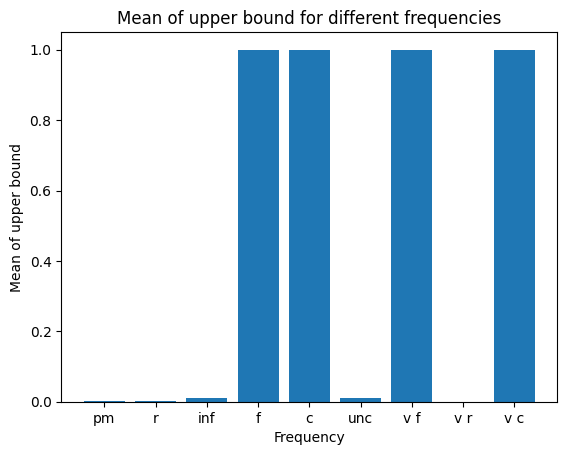

In [10]:
# Means of the lower and upper bounds
print("Means of the lower and upper bounds")
print("Postmarketing", postmarketing["Lower bound"].mean(), postmarketing["Upper bound"].mean())
print("Rare", rare["Lower bound"].mean(), rare["Upper bound"].mean())
print("Infrequent", infrequent["Lower bound"].mean(), infrequent["Upper bound"].mean())
print("Frequent", frequent["Lower bound"].mean(), frequent["Upper bound"].mean())
print("Common", common["Lower bound"].mean(), common["Upper bound"].mean())
print("Uncommon", uncommon["Lower bound"].mean(), uncommon["Upper bound"].mean())
print("Very frequent", very_frequent["Lower bound"].mean(), very_frequent["Upper bound"].mean())
print("Very rare", very_rare["Lower bound"].mean(), very_rare["Upper bound"].mean())
print("Very common", very_common["Lower bound"].mean(), very_common["Upper bound"].mean())

# Plotting the means of the lower and upper bounds

means = [postmarketing["Lower bound"].mean(), rare["Lower bound"].mean(), infrequent["Lower bound"].mean(), frequent["Lower bound"].mean(), common["Lower bound"].mean(), uncommon["Lower bound"].mean(), very_frequent["Lower bound"].mean(), very_rare["Lower bound"].mean(), very_common["Lower bound"].mean()]
freq = ["pm", "r", "inf", "f", "c", "unc", "v f", "v r", "v c"]
plt.bar(freq, means)
plt.ylabel("Mean of lower bound")
plt.xlabel("Frequency")
plt.title("Mean of lower bound for different frequencies")
plt.show()

means = [postmarketing["Upper bound"].mean(), rare["Upper bound"].mean(), infrequent["Upper bound"].mean(), frequent["Upper bound"].mean(), common["Upper bound"].mean(), uncommon["Upper bound"].mean(), very_frequent["Upper bound"].mean(), very_rare["Upper bound"].mean(), very_common["Upper bound"].mean()]
freq = ["pm", "r", "inf", "f", "c", "unc", "v f", "v r", "v c"]
plt.bar(freq, means)
plt.ylabel("Mean of upper bound")
plt.xlabel("Frequency")
plt.title("Mean of upper bound for different frequencies")
plt.show()

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_20082/3875452748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Lower bound"], hist=False, label="Data")
/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_20082/3875452748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

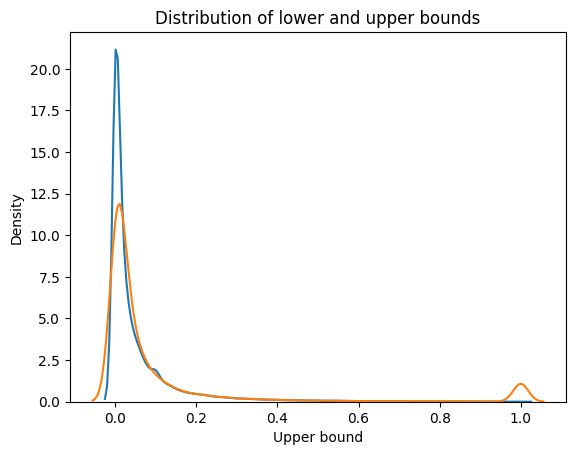

In [11]:
# Plot distrubution of lower and upper bounds
sns.distplot(data["Lower bound"], hist=False, label="Data")
sns.distplot(data["Upper bound"], hist=False, label="Data")
plt.title("Distribution of lower and upper bounds")
plt.show()


In [12]:
postmarketing.describe()

,Lower bound,Upper bound
count,41655.0,4.165500e+04
mean,0.0,1.000000e-03
std,0.0,4.336861e-19
min,0.0,1.000000e-03
25%,0.0,1.000000e-03
50%,0.0,1.000000e-03
75%,0.0,1.000000e-03
max,0.0,1.000000e-03


In [13]:
rare.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
1736,CID100000444,CID000000444,C0002622,NaN,rare,0.0,0.001,LLT,C0002622,Amnesia
1737,CID100000444,CID000000444,C0002622,NaN,rare,0.0,0.001,PT,C0002622,Amnesia
1740,CID100000444,CID000000444,C0002871,NaN,rare,0.0,0.001,LLT,C0002871,Anaemia
1741,CID100000444,CID000000444,C0002871,NaN,rare,0.0,0.001,PT,C0002871,Anaemia
1794,CID100000444,CID000000444,C0003537,NaN,rare,0.0,0.001,LLT,C0003537,Aphasia


In [14]:
infrequent.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
1714,CID100000444,CID000000444,C0002170,NaN,infrequent,0.001,0.01,LLT,C0002170,Alopecia
1715,CID100000444,CID000000444,C0002170,NaN,infrequent,0.001,0.01,PT,C0002170,Alopecia
1871,CID100000444,CID000000444,C0004604,NaN,infrequent,0.001,0.01,LLT,C0004604,Back pain
1872,CID100000444,CID000000444,C0004604,NaN,infrequent,0.001,0.01,PT,C0004604,Back pain
1885,CID100000444,CID000000444,C0006277,NaN,infrequent,0.001,0.01,LLT,C0006277,Bronchitis


In [15]:
frequent.head(), frequent.describe()

(       Stitch flat Stitch stereo      UMLS Placebo Frequency  Lower bound  \
 1728  CID100000444  CID000000444  C0002418     NaN  frequent         0.01   
 1729  CID100000444  CID000000444  C0002418     NaN  frequent         0.01   
 1853  CID100000444  CID000000444  C0004093     NaN  frequent         0.01   
 1854  CID100000444  CID000000444  C0004093     NaN  frequent         0.01   
 1859  CID100000444  CID000000444  C0004134     NaN  frequent         0.01   
 
       Upper bound MedDRA term UMLS concept Side effect  
 1728          1.0         LLT     C0002418   Amblyopia  
 1729          1.0          PT     C0002418   Amblyopia  
 1853          1.0         LLT     C0004093    Asthenia  
 1854          1.0          PT     C0004093    Asthenia  
 1859          1.0         LLT     C0004134      Ataxia  ,
         Lower bound  Upper bound
 count  3.069000e+03       3069.0
 mean   1.000000e-02          1.0
 std    1.735006e-18          0.0
 min    1.000000e-02          1.0
 25%    1.0

In [16]:
common.head(),common.describe()

(      Stitch flat Stitch stereo      UMLS Placebo Frequency  Lower bound  \
 514  CID100000137  CID000000137  C0151662     NaN    common         0.01   
 515  CID100000137  CID000000137  C0151662     NaN    common         0.01   
 516  CID100000137  CID000000137  C0151904     NaN    common         0.01   
 517  CID100000137  CID000000137  C0151904     NaN    common         0.01   
 518  CID100000137  CID000000137  C0151905     NaN    common         0.01   
 
      Upper bound MedDRA term UMLS concept  \
 514          1.0         LLT     C0151662   
 515          1.0          PT     C0151662   
 516          1.0         LLT     C0151904   
 517          1.0          PT     C0151904   
 518          1.0         LLT     C0151905   
 
                               Side effect  
 514   Gamma-glutamyltransferase increased  
 515   Gamma-glutamyltransferase increased  
 516  Aspartate aminotransferase increased  
 517  Aspartate aminotransferase increased  
 518    Alanine aminotransferase 

In [17]:
uncommon.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
1584,CID100000247,CID000000247,C0002170,NaN,uncommon,0.001,0.01,LLT,C0002170,Alopecia
1585,CID100000247,CID000000247,C0002170,NaN,uncommon,0.001,0.01,PT,C0002170,Alopecia
1588,CID100000247,CID000000247,C0003123,NaN,uncommon,0.001,0.01,LLT,C0003123,Anorexia
1589,CID100000247,CID000000247,C0003123,NaN,uncommon,0.001,0.01,PT,C0232462,Decreased appetite
1594,CID100000247,CID000000247,C0011991,NaN,uncommon,0.001,0.01,LLT,C0011991,Diarrhoea


In [18]:
very_frequent.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
76672,CID100003730,CID000003730,C0017178,NaN,very frequent,0.1,1.0,LLT,C0017178,Gastrointestinal disorder
76673,CID100003730,CID000003730,C0017178,NaN,very frequent,0.1,1.0,PT,C0017178,Gastrointestinal disorder


In [19]:
very_rare.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
6903,CID100000699,CID003001028,C0008489,NaN,very rare,0.0,0.0001,LLT,C0008489,Chorea
6904,CID100000699,CID003001028,C0008489,NaN,very rare,0.0,0.0001,PT,C0008489,Chorea
6983,CID100000699,CID003001028,C0014173,NaN,very rare,0.0,0.0001,LLT,C0014173,Endometrial hyperplasia
6984,CID100000699,CID003001028,C0014173,NaN,very rare,0.0,0.0001,PT,C0014173,Endometrial hyperplasia
6987,CID100000699,CID003001028,C0014742,NaN,very rare,0.0,0.0001,LLT,C0014742,Erythema multiforme


In [20]:
very_common.head()

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
5177,CID100000450,CID000005757,C0151505,NaN,very common,0.1,1.0,LLT,C0151505,Application site reaction
5178,CID100000450,CID000005757,C0151505,NaN,very common,0.1,1.0,PT,C0151505,Application site reaction
5395,CID100000450,CID000005757,C0262397,NaN,very common,0.1,1.0,LLT,C0262397,Breast tenderness
5396,CID100000450,CID000005757,C0262397,NaN,very common,0.1,1.0,PT,C0262397,Breast tenderness
5448,CID100000450,CID000005757,C0520893,NaN,very common,0.1,1.0,LLT,C0520893,Localized exfoliation


In [21]:
zeroes = data[data['Upper bound'] == 0]
zeroes

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
469,CID100000137,CID000000137,C0013604,NaN,0%,0.0,0.0,LLT,C0013604,Oedema
470,CID100000137,CID000000137,C0013604,NaN,0%,0.0,0.0,PT,C0013604,Oedema
473,CID100000137,CID000000137,C0015256,NaN,0%,0.0,0.0,LLT,C0015256,Excoriation
474,CID100000137,CID000000137,C0015256,NaN,0%,0.0,0.0,PT,C0015256,Excoriation
477,CID100000137,CID000000137,C0019080,NaN,0%,0.0,0.0,LLT,C0019080,Haemorrhage
...,...,...,...,...,...,...,...,...,...,...
290212,CID171306834,CID071306834,C0002871,NaN,0%,0.0,0.0,PT,C0002871,Anaemia
290443,CID171306834,CID071306834,C0010200,NaN,0%,0.0,0.0,LLT,C0010200,Cough
290444,CID171306834,CID071306834,C0010200,NaN,0%,0.0,0.0,PT,C0010200,Cough
290893,CID171306834,CID071306834,C0023530,NaN,0%,0.0,0.0,LLT,C0023530,Leukopenia


### What are some special cases of 'frequency'

In [22]:
unique_text = data["Frequency"][~data["Frequency"].astype(str).str.contains("%", na=False)].unique()
print(unique_text)

['common' 'postmarketing' 'uncommon' 'infrequent' 'frequent' 'rare'
 'very common' 'very rare' '0 to 2' '0-2' '8 to 66' '8-66' '0 to 33'
 '0-33' '10 to 13' '10-13' '1 to 13' '1-13' '1 to 2' '1-2' '31 to 43'
 '31-43' '1 to 6' '1-6' 'very frequent']


# Converting into ordinal data

### Handling already ordinal data

In [23]:
data["Frequency"].replace({"very rare": "rare",
                            "postmarketing": "rare",
                            "infrequent": "uncommon",
                            "frequent": "common",
                            "very frequent": "common",
                            "very common": "common"}, inplace=True)

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_20082/111319443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Frequency"].replace({"very rare": "rare",


### Splitting data into subsets
There are some patterns in the way frequency is categorized: either by natural language, by a percentage or a mix (e.g 3 to 4%). To optimize the data for the use, it is easier to split the data into subsets and handle them separately.

In [24]:
wrongs = []
for i in range(len(data)):
    if "to" in data["Frequency"].iloc[i]:
        wrongs.append(i)
    elif "-" in data["Frequency"].iloc[i]:
        wrongs.append(i)

print(len(wrongs))

1178


In [25]:
# Dataframes of mix of natural language and numerical values
wrong_val = pd.DataFrame(data.iloc[wrongs])
wrong_val

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
6394,CID100000596,CID000006252,C0235032,NaN,8-10%,0.08,0.10,LLT,C0235032,Neurotoxicity
6395,CID100000596,CID000006252,C0235032,NaN,8-10%,0.08,0.10,PT,C0235032,Neurotoxicity
6612,CID100000598,CID000000598,C0018681,NaN,3-11%,0.03,0.11,LLT,C0018681,Headache
6613,CID100000598,CID000000598,C0018681,NaN,3-11%,0.03,0.11,PT,C0018681,Headache
6762,CID100000598,CID000000598,C2830004,NaN,3-11%,0.03,0.11,LLT,C2830004,Somnolence
...,...,...,...,...,...,...,...,...,...,...
263503,CID105281007,CID005353562,C0002170,NaN,1-10%,0.01,0.10,PT,C0002170,Alopecia
263512,CID105281007,CID005353562,C0042109,NaN,1-10%,0.01,0.10,LLT,C0042109,Urticaria
263513,CID105281007,CID005353562,C0042109,NaN,1-10%,0.01,0.10,PT,C0042109,Urticaria
263522,CID105281007,CID005353562,C1527358,NaN,1-10%,0.01,0.10,LLT,C1527358,Phototoxicity


In [26]:
df_clean = data.drop(wrongs)
df_clean

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
0,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,NaN,21%,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,NaN,5%,0.05,0.05,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,NaN,5%,0.05,0.05,PT,C0000737,Abdominal pain
...,...,...,...,...,...,...,...,...,...,...
291627,CID171306834,CID071306834,C2830004,NaN,5%,0.00,0.05,PT,C2830004,Somnolence
291628,CID171306834,CID071306834,C2830004,NaN,5%,0.05,0.05,LLT,C2830004,Somnolence
291629,CID171306834,CID071306834,C2830004,NaN,5%,0.05,0.05,PT,C2830004,Somnolence
291630,CID171306834,CID071306834,C2830004,NaN,9%,0.09,0.09,LLT,C2830004,Somnolence


Ensuring that the data is in the right format is important for the model to understand the data.

In [27]:
def to_float(value):
    if isinstance(value, str):
        if "%" in value:  # Check if it's a percentage
            return float(value.replace("%", "").strip()) / 100  # Convert to decimal
        elif "to" in value or "-" in value:  # Check if it's a range
            #drop the value
            return np.nan
    return value
    
df_clean["Frequency"] = df_clean["Frequency"].apply(to_float)

In [28]:
df_clean

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
0,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,NaN,0.05,0.05,0.05,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,NaN,0.05,0.05,0.05,PT,C0000737,Abdominal pain
...,...,...,...,...,...,...,...,...,...,...
291627,CID171306834,CID071306834,C2830004,NaN,0.05,0.00,0.05,PT,C2830004,Somnolence
291628,CID171306834,CID071306834,C2830004,NaN,0.05,0.05,0.05,LLT,C2830004,Somnolence
291629,CID171306834,CID071306834,C2830004,NaN,0.05,0.05,0.05,PT,C2830004,Somnolence
291630,CID171306834,CID071306834,C2830004,NaN,0.09,0.09,0.09,LLT,C2830004,Somnolence


In [29]:
# Dataframe of numerical values
df_num = df_clean[df_clean["Frequency"].apply(lambda x: isinstance(x, float))]
df_num

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
0,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,NaN,0.21,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,NaN,0.05,0.05,0.05,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,NaN,0.05,0.05,0.05,PT,C0000737,Abdominal pain
...,...,...,...,...,...,...,...,...,...,...
291627,CID171306834,CID071306834,C2830004,NaN,0.05,0.00,0.05,PT,C2830004,Somnolence
291628,CID171306834,CID071306834,C2830004,NaN,0.05,0.05,0.05,LLT,C2830004,Somnolence
291629,CID171306834,CID071306834,C2830004,NaN,0.05,0.05,0.05,PT,C2830004,Somnolence
291630,CID171306834,CID071306834,C2830004,NaN,0.09,0.09,0.09,LLT,C2830004,Somnolence


In [30]:
# Dataframe of text values
df_text = df_clean.drop(df_num.index)
df_text

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
514,CID100000137,CID000000137,C0151662,NaN,common,0.01,1.000,LLT,C0151662,Gamma-glutamyltransferase increased
515,CID100000137,CID000000137,C0151662,NaN,common,0.01,1.000,PT,C0151662,Gamma-glutamyltransferase increased
516,CID100000137,CID000000137,C0151904,NaN,common,0.01,1.000,LLT,C0151904,Aspartate aminotransferase increased
517,CID100000137,CID000000137,C0151904,NaN,common,0.01,1.000,PT,C0151904,Aspartate aminotransferase increased
518,CID100000137,CID000000137,C0151905,NaN,common,0.01,1.000,LLT,C0151905,Alanine aminotransferase increased
...,...,...,...,...,...,...,...,...,...,...
291603,CID171306834,CID071306834,C1384666,NaN,rare,0.00,0.001,PT,C1384666,Hearing impaired
291604,CID171306834,CID071306834,C1384666,NaN,rare,0.00,0.001,PT,C0011053,Deafness
291605,CID171306834,CID071306834,C1565489,NaN,rare,0.00,0.001,LLT,C1565489,Renal impairment
291606,CID171306834,CID071306834,C1565489,NaN,rare,0.00,0.001,PT,C0035078,Renal failure


## Assigning to categories

In [31]:
# Helper function
def categorize(value):
    if value == 0:
        return "not detected"
    if value <= 0.001:
        return "rare"
    elif value <= 0.01:
        return "uncommon"
    elif value <= 1:
        return "common"
    return "very common"

### Only numerical values

In [32]:
df_num["Frequency"] = df_num["Frequency"].apply(categorize)
df_num

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_20082/487122252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Frequency"] = df_num["Frequency"].apply(categorize)


,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
0,CID100000085,CID000010917,C0000737,NaN,common,0.21,0.21,LLT,C0000737,Abdominal pain
1,CID100000085,CID000010917,C0000737,NaN,common,0.21,0.21,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,NaN,common,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,CID100000085,CID000010917,C0000737,NaN,common,0.05,0.05,LLT,C0000737,Abdominal pain
4,CID100000085,CID000010917,C0000737,NaN,common,0.05,0.05,PT,C0000737,Abdominal pain
...,...,...,...,...,...,...,...,...,...,...
291627,CID171306834,CID071306834,C2830004,NaN,common,0.00,0.05,PT,C2830004,Somnolence
291628,CID171306834,CID071306834,C2830004,NaN,common,0.05,0.05,LLT,C2830004,Somnolence
291629,CID171306834,CID071306834,C2830004,NaN,common,0.05,0.05,PT,C2830004,Somnolence
291630,CID171306834,CID071306834,C2830004,NaN,common,0.09,0.09,LLT,C2830004,Somnolence


### Values in ranges

In [33]:
wrong_val['Frequency'] = wrong_val['Upper bound'].apply(categorize)
wrong_val

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
6394,CID100000596,CID000006252,C0235032,NaN,common,0.08,0.10,LLT,C0235032,Neurotoxicity
6395,CID100000596,CID000006252,C0235032,NaN,common,0.08,0.10,PT,C0235032,Neurotoxicity
6612,CID100000598,CID000000598,C0018681,NaN,common,0.03,0.11,LLT,C0018681,Headache
6613,CID100000598,CID000000598,C0018681,NaN,common,0.03,0.11,PT,C0018681,Headache
6762,CID100000598,CID000000598,C2830004,NaN,common,0.03,0.11,LLT,C2830004,Somnolence
...,...,...,...,...,...,...,...,...,...,...
263503,CID105281007,CID005353562,C0002170,NaN,common,0.01,0.10,PT,C0002170,Alopecia
263512,CID105281007,CID005353562,C0042109,NaN,common,0.01,0.10,LLT,C0042109,Urticaria
263513,CID105281007,CID005353562,C0042109,NaN,common,0.01,0.10,PT,C0042109,Urticaria
263522,CID105281007,CID005353562,C1527358,NaN,common,0.01,0.10,LLT,C1527358,Phototoxicity


In [34]:
# Combine the dataframes
df = pd.concat([df_text, df_num, wrong_val])
df

,Stitch flat,Stitch stereo,UMLS,Placebo,Frequency,Lower bound,Upper bound,MedDRA term,UMLS concept,Side effect
514,CID100000137,CID000000137,C0151662,NaN,common,0.01,1.0,LLT,C0151662,Gamma-glutamyltransferase increased
515,CID100000137,CID000000137,C0151662,NaN,common,0.01,1.0,PT,C0151662,Gamma-glutamyltransferase increased
516,CID100000137,CID000000137,C0151904,NaN,common,0.01,1.0,LLT,C0151904,Aspartate aminotransferase increased
517,CID100000137,CID000000137,C0151904,NaN,common,0.01,1.0,PT,C0151904,Aspartate aminotransferase increased
518,CID100000137,CID000000137,C0151905,NaN,common,0.01,1.0,LLT,C0151905,Alanine aminotransferase increased
...,...,...,...,...,...,...,...,...,...,...
263503,CID105281007,CID005353562,C0002170,NaN,common,0.01,0.1,PT,C0002170,Alopecia
263512,CID105281007,CID005353562,C0042109,NaN,common,0.01,0.1,LLT,C0042109,Urticaria
263513,CID105281007,CID005353562,C0042109,NaN,common,0.01,0.1,PT,C0042109,Urticaria
263522,CID105281007,CID005353562,C1527358,NaN,common,0.01,0.1,LLT,C1527358,Phototoxicity


## Save dataset

In [36]:
#save the cleaned data
df.to_csv('/Users/christine/Bachelor/src/data/meddra_freq_cleaned.tsv', sep='\t', index=False)